# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# Starbucks Capstone Challenge

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Business understanding">Business understanding</a></li>
<li><a href="#Data understanding">Data understanding</a></li>
<li><a href="#Data preparation">Data preparation</a></li>
<li><a href="#Modeling">Data Modeling</a></li>
<li><a href="#Evaluation ">Evaluation</a></li>
<li><a href="#conclusions">Conclusions</a></li>


</ul>

<a id='intro'></a>
### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

In this project, we will follow the CRISP-DM process (Cross Industry Process for Data Mining). CRISP-DM stands for:


- Business understanding
- Data understanding
- Data preparation
- Modeling
- Evaluation
- Deployment

<a id='Business understanding'></a>
### Business understanding

In order to develop a recommendation engine which help Starbucks to sent an approbite offer to their customers. We have to explore some points:
- Starbucks customers
- Most accepted offer for every customer group
- Distribution of offers type vs. group of customers

<a id='Data understanding'></a>
### Data understanding

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Importing Packages required**

In [1]:
# Import python libraries
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

**Importing Data**

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

**Exploring Portfolio**

In [3]:
#Snapshot of the data set
portfolio.head(10)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [4]:
#Get data set iformation
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [5]:
#Find missing data
portfolio.isnull().sum()

channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

In [6]:
#Column' name has no missing data 
portfolio.columns[portfolio.isnull().mean()==0]

Index(['channels', 'difficulty', 'duration', 'id', 'offer_type', 'reward'], dtype='object')

In [7]:
#Column' name has most missing data 
portfolio.columns[portfolio.isnull().mean() > 0.75]

Index([], dtype='object')

In [8]:
#Statisticals
portfolio.describe()

,difficulty,duration,reward
count,10.000000,10.000000,10.000000
mean,7.700000,6.500000,4.200000
std,5.831905,2.321398,3.583915
min,0.000000,3.000000,0.000000
25%,5.000000,5.000000,2.000000
50%,8.500000,7.000000,4.000000
75%,10.000000,7.000000,5.000000
max,20.000000,10.000000,10.000000


In [9]:
#Unique values for "Channels"
np.unique(portfolio['channels']).tolist()

[['email', 'mobile', 'social'],
 ['web', 'email'],
 ['web', 'email', 'mobile'],
 ['web', 'email', 'mobile', 'social']]

In [10]:
#Unique values for "offer_type"
portfolio['offer_type'].unique().tolist()

['bogo', 'informational', 'discount']

**Summary**

- 10 rows
- No missing Values
- Duplication in Channels column

**Exploring Profile**

In [11]:
#Snapshot of the data set
profile.head(10)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0
9,118,20161122,None,8974fc5686fe429db53ddde067b88302,NaN


In [12]:
#Get data set iformation
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB


In [13]:
#Find missing data
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [14]:
#Column' name has no missing data 
set(profile.columns[profile.isnull().mean()==0])

{'age', 'became_member_on', 'id'}

In [15]:
#Column' name has most missing data 
set(profile.columns[profile.isnull().mean() > 0.75])

set()

In [16]:
#Statisticals
profile.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [17]:
#Outlier value where gender is Null
profile.age[profile.gender.isnull()][0]

118

In [18]:
#Number of rows has the Outlier
profile.age[profile.gender.isnull()].value_counts().iloc[0]

2175

**Summary**

- 17000 rows
- Columns have no missing are 'age', 'became_member_on', 'id' 
- Notice some outlier associated with nulls

**Exploring Transcript**

In [19]:
#Snapshot of the data set
transcript.head(10)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'}
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'}
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [20]:
#Get data set iformation
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [21]:
#Find missing data
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [22]:
#Column' name has no missing data 
set(transcript.columns[transcript.isnull().mean()==0])

{'event', 'person', 'time', 'value'}

In [23]:
#Statisticals
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [24]:
#Unique values for "offer_type"
transcript['event'].unique().tolist()

['offer received', 'offer viewed', 'transaction', 'offer completed']

**Summary**

- 306534 rows
- No missing
- Event column has 4 unique values

<a id='Data preparation'></a>
### Data preparation

**Portfolio data preparation**

In this section:
- Split Channels column
- Rename column 'id' to 'offer_id'

In [25]:
#Copy of the data set
cleaned_portfolio = portfolio.copy()

In [26]:
#Split Channels column
def col_split(df, column):
    splits = []
    for s in df[column]:
        for i in s:
            if i not in splits:
                splits.append(i)
    for split in splits:
        df[split] = df[column].apply(lambda x: 1 if split in x else 0)
        
    df.drop([column], axis=1, inplace=True) 
    
    return splits

col_split(cleaned_portfolio ,'channels')

['email', 'mobile', 'social', 'web']

In [27]:
#Rename column 'id' to 'offer_id'
cleaned_portfolio.rename(columns={'id': 'offer_id'}, inplace=True)

In [28]:
#Encode the 'offer_type' column
cleaned_portfolio_t = ['offer_id',
                    'difficulty',
                    'durationdays',
                    'reward',
                   'offer_type',
                   'offer_id',
                   'email',
                   'mobile',
                   'social',
                   'web'
                  ]
offer_type = pd.get_dummies(portfolio['offer_type'])
cleaned_portfolio_t.extend(offer_type.columns.values)
# Add the new offer type columns to data frame 
cleaned_portfolio  = pd.concat([cleaned_portfolio, offer_type], axis=1)

In [29]:
cleaned_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
difficulty       10 non-null int64
duration         10 non-null int64
offer_id         10 non-null object
offer_type       10 non-null object
reward           10 non-null int64
email            10 non-null int64
mobile           10 non-null int64
social           10 non-null int64
web              10 non-null int64
bogo             10 non-null uint8
discount         10 non-null uint8
informational    10 non-null uint8
dtypes: int64(7), object(2), uint8(3)
memory usage: 830.0+ bytes


In [30]:
cleaned_portfolio.head(10)

,difficulty,duration,offer_id,offer_type,reward,email,mobile,social,web,bogo,discount,informational
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0,1,0,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1,1,0,0
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1,0,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1,1,0,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1,0,1,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1,0,1,0
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1,0,1,0
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,1,1,1,0,0,0,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1,1,0,0
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,0,1,0,1,0


In [31]:
cleaned_portfolio.shape

(10, 12)

**Profile data preparation**

In this section:
- Age outlier '118'
- Fill null gender to Other 'O'
- Fill null income to mean
- Convert column 'became_member_on' from date to number of days
- Rename column 'id' to 'customer_id'
- Delete all missing values

In [32]:
#Copy of the data set
cleaned_profile = profile.copy()

In [33]:
#Replace age outlier with Null
cleaned_profile['age'] = cleaned_profile['age'].apply(lambda x: np.nan if x == 118 else x)

In [34]:
#Replace null 'gender' to 'O'
cleaned_profile['gender'].fillna('O', inplace = True)

In [35]:
#Replace null 'income' to mean
mean_val = profile.income.mean()
cleaned_profile['income'].fillna(mean_val, inplace = True)

In [36]:
#Convert column 'became_member_on' from date to number of days
cleaned_profile['became_member_on_by_days'] = datetime.datetime.today().date() - pd.to_datetime(cleaned_profile['became_member_on'], format='%Y%m%d').dt.date
cleaned_profile['became_member_on_by_days'] = cleaned_profile['became_member_on_by_days'].dt.days

In [37]:
#Rename column 'id' to 'customer_id'
cleaned_profile.rename(columns={'id': 'customer_id'}, inplace=True)

In [38]:
#Delete all missing data
cleaned_profile.dropna(inplace=True)

In [39]:
#Converting
cleaned_profile['age'] = cleaned_profile['age'].apply(lambda x: int(x))
cleaned_profile['income'] = cleaned_profile['income'].apply(lambda x: float(x))

In [40]:
cleaned_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 6 columns):
age                         14825 non-null int64
became_member_on            14825 non-null int64
gender                      14825 non-null object
customer_id                 14825 non-null object
income                      14825 non-null float64
became_member_on_by_days    14825 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 810.7+ KB


In [41]:
cleaned_profile.head()

,age,became_member_on,gender,customer_id,income,became_member_on_by_days
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0,996
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,1063
5,68,20180426,M,e2127556f4f64592b11af22de27a7932,70000.0,711
8,65,20180209,M,389bc3fa690240e798340f5a15918d5c,53000.0,787
12,58,20171111,M,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,877


In [42]:
cleaned_profile.shape

(14825, 6)

**Transcript data preparation**

In this section:
- Split column 'event' to 'offer_received','offer_viewed','offer_completed','transaction'
- Split column 'value' to 'offer','transaction'
- Rename column 'person' to 'customer_id'

In [43]:
#Copy of the data set
cleaned_transcript = transcript.copy()

In [44]:
#Split event column
def col_split1(df, column):
    splits = []
    for s in df[column]:
        if s not in splits:
            splits.append(s)
    for split in splits:
        df[split] = df[column].apply(lambda x: 1 if split in x else 0)
        
    
    return splits

col_split1(cleaned_transcript ,'event')

['offer received', 'offer viewed', 'transaction', 'offer completed']

In [45]:
#Split Channels column
def col_split3(df, column):
    splits = []
    for s in df[column]:
        for i in s:
            if i not in splits:
                splits.append(i)
    for split in splits:
        df[split] = df[column].apply(lambda x: 1 if split in x else 0)
        
    
    return splits

col_split3(cleaned_transcript ,'value')

['offer id', 'amount', 'offer_id', 'reward']

In [46]:
cleaned_transcript.head()

,event,person,time,value,offer received,offer viewed,transaction,offer completed,offer id,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},1,0,0,0,1,0,0,0
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},1,0,0,0,1,0,0,0
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},1,0,0,0,1,0,0,0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},1,0,0,0,1,0,0,0
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},1,0,0,0,1,0,0,0


In [47]:
cleaned_transcript['offer'] = cleaned_transcript['offer id'] + cleaned_transcript['offer_id']

In [48]:
cleaned_transcript['offer'].unique().tolist()

[1, 0]

In [49]:
# Split the dataframe to "Offers" (i.e. offer received, offer viewed, offer completed) / "Payment" related 
offer = cleaned_transcript[cleaned_transcript['offer']==1]
transaction = cleaned_transcript[cleaned_transcript['offer']==0]

# Extract the "Offer ID" / "Amount" from value column
offer['offer_id'] = offer['value'].apply(lambda x: x['offer id'] if ('offer id' in x) else x['offer_id'])
transaction['amount'] = transaction['value'].apply(lambda x: x['amount'] if ('amount' in x) else None)

# Append dataframe "Offers" & "Payment" as "Cleaned Transcript"
cleaned_transcript = pd.concat([offer, transaction], sort=False)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [50]:
#Rename "person" to "customer ID"
cleaned_transcript.rename(columns={'person': 'customer_id'}, inplace=True)

In [51]:
cleaned_transcript.head(100)

,event,customer_id,time,value,offer received,offer viewed,transaction,offer completed,offer id,amount,offer_id,reward,offer
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},1,0,0,0,1,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},1,0,0,0,1,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},1,0,0,0,1,0.0,2906b810c7d4411798c6938adc9daaa5,0,1
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},1,0,0,0,1,0.0,fafdcd668e3743c1bb461111dcafc2a4,0,1
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},1,0,0,0,1,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1
5,offer received,389bc3fa690240e798340f5a15918d5c,0,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},1,0,0,0,1,0.0,f19421c1d4aa40978ebb69ca19b0e20d,0,1
6,offer received,c4863c7985cf408faee930f111475da3,0,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},1,0,0,0,1,0.0,2298d6c36e964ae4a3e7e9706d1fb8c2,0,1
7,offer received,2eeac8d8feae4a8cad5a6af0499a211d,0,{'offer id': '3f207df678b143eea3cee63160fa8bed'},1,0,0,0,1,0.0,3f207df678b143eea3cee63160fa8bed,0,1
8,offer received,aa4862eba776480b8bb9c68455b8c2e1,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},1,0,0,0,1,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1
9,offer received,31dda685af34476cad5bc968bdb01c53,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},1,0,0,0,1,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1


In [52]:
cleaned_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 13 columns):
event              306534 non-null object
customer_id        306534 non-null object
time               306534 non-null int64
value              306534 non-null object
offer received     306534 non-null int64
offer viewed       306534 non-null int64
transaction        306534 non-null int64
offer completed    306534 non-null int64
offer id           306534 non-null int64
amount             306534 non-null float64
offer_id           306534 non-null object
reward             306534 non-null int64
offer              306534 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 32.7+ MB


In [53]:
cleaned_transcript.head()

,event,customer_id,time,value,offer received,offer viewed,transaction,offer completed,offer id,amount,offer_id,reward,offer
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},1,0,0,0,1,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},1,0,0,0,1,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},1,0,0,0,1,0.0,2906b810c7d4411798c6938adc9daaa5,0,1
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},1,0,0,0,1,0.0,fafdcd668e3743c1bb461111dcafc2a4,0,1
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},1,0,0,0,1,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1


In [54]:
cleaned_transcript.shape

(306534, 13)

**Distribution of Starbucks customers**

In [55]:
#Starbucks customers ages
cleaned_profile.age.describe()

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64

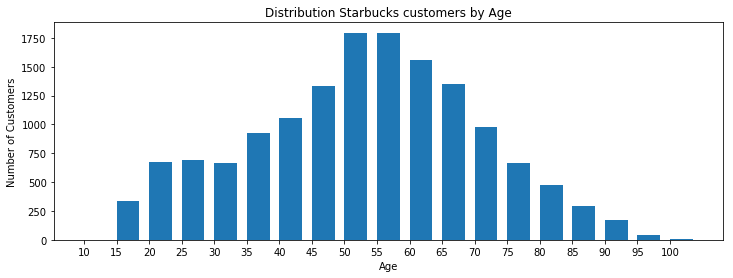

In [56]:
#Visualize of Distribution Starbucks customers by Age
cleaned_profile_age=cleaned_profile.groupby(pd.cut(cleaned_profile['age'], 
                                         np.arange(10, 105+5, 5)))['customer_id'].count()
plt.figure(figsize=(12,4))
plt.bar(np.arange(10, 105, 5),cleaned_profile_age,width=3.5, align='edge')
plt.xticks(np.arange(10, 105, 5))
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution Starbucks customers by Age')
plt.show()

In [57]:
#Starbucks customers genders
cleaned_profile_gender_perc = cleaned_profile['gender'].value_counts()
cleaned_profile_gender_perc *= 100 / cleaned_profile_gender_perc.sum()
cleaned_profile_gender_perc

M    57.227656
F    41.342327
O     1.430017
Name: gender, dtype: float64

In [58]:
#Starbucks customers incomes
cleaned_profile.income.describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64

Findings:
- There is 14825 customers
- Average age is 54 years
- Average income is 65000
- Most customers are Male.

**Most accepted offer for every customer group**

In [59]:
cleaned_transcript.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 13 columns):
event              306534 non-null object
customer_id        306534 non-null object
time               306534 non-null int64
value              306534 non-null object
offer received     306534 non-null int64
offer viewed       306534 non-null int64
transaction        306534 non-null int64
offer completed    306534 non-null int64
offer id           306534 non-null int64
amount             306534 non-null float64
offer_id           306534 non-null object
reward             306534 non-null int64
offer              306534 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 32.7+ MB


In [60]:
#Copy of Transcript
df_clean = cleaned_transcript.copy()
df_clean['record'] = df_clean.value.apply(lambda x: list(x.keys())[0])
df_clean['record_value'] = df_clean.value.apply(lambda x: list(x.values())[0])
    
#Remove customer id's that are not in the customer profile DataFrame
select_data = df_clean['customer_id'].isin(cleaned_profile['customer_id'])
df_clean = df_clean[select_data]
    
#Select customer offers and split it
pattern_obj = re.compile('^offer (?:received|viewed|completed)')
tmp_offer = lambda elem: pattern_obj.match(elem) != None
is_offer = df_clean['event'].apply(tmp_offer)

#Give the results in a new data frame
offer_data = df_clean[is_offer].copy()
offer_data = offer_data.reset_index(drop=True)

#Initialize a list that describes the desired output DataFrame
column_order = ['event','customer_id', 'offer_id', 'time']

#Transform a column that describes a customer offer event
pattern_obj = re.compile('^offer ([a-z]+$)')

tmp_split = lambda elem: pattern_obj.match(elem).groups(1)[0]

offer_data['event'] = offer_data['event'].apply(tmp_split)

#One hot encode customer offer events
event_df = pd.get_dummies(offer_data['event'])
column_order.extend(event_df.columns.values)

#Create a DataFrame that describes customer offer events
offer_data = pd.concat([offer_data, event_df], axis=1)
offer_data = offer_data[column_order]

#Select customer transaction events
transaction = df_clean[is_offer == False]
transaction = transaction.reset_index(drop=True)

#Transform customer transaction event values
transaction['amount'] = transaction['record_value'].astype(float)
    
#Create a DataFrame that describes customer transactions
transaction = transaction.drop(columns=['event', 'record_value', 'record'])

#transaction = transaction.drop(columns=['record_value', 'record'])
column_order = ['customer_id', 'amount', 'time']
transaction = transaction[column_order]

In [61]:
offer_data.info()
offer_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148805 entries, 0 to 148804
Data columns (total 7 columns):
event          148805 non-null object
customer_id    148805 non-null object
offer_id       148805 non-null object
time           148805 non-null int64
completed      148805 non-null uint8
received       148805 non-null uint8
viewed         148805 non-null uint8
dtypes: int64(1), object(3), uint8(3)
memory usage: 5.0+ MB


,event,customer_id,offer_id,time,completed,received,viewed
90730,viewed,572063614a93442cb937f13d104ecc23,2298d6c36e964ae4a3e7e9706d1fb8c2,432,0,0,1
67761,viewed,2f4bde67035f445d9c805e09bef359fe,4d5c57ea9a6940dd891ad53e9dbe8da0,366,0,0,1
75892,received,8569444509e1462abe0310cbbd323a86,3f207df678b143eea3cee63160fa8bed,408,0,1,0
96719,viewed,cceda95e6893423798bcdbb1e34ca003,3f207df678b143eea3cee63160fa8bed,486,0,0,1
122244,received,9f406c4d46b14c73817d1a45766db166,9b98b8c7a33c4b65b9aebfe6a799e6d9,576,0,1,0


In [62]:
#Merging all three datasets to have a complete, clean dataset 

df_offer = pd.merge(offer_data, cleaned_portfolio, how='left', left_on='offer_id', 
                         right_on='offer_id')

df_offer = pd.merge(df_offer, cleaned_profile, how='left', left_on='customer_id', 
                         right_on='customer_id')

In [63]:
#Number of offer types
df_offer.offer_type.value_counts()

bogo             63834
discount         62311
informational    22660
Name: offer_type, dtype: int64

**Distribution of offers type vs. group of customers**

In [64]:
#Number of transcripts by event
cleaned_transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [65]:
#Now show the percentage by event
cleaned_transcript['event'].value_counts(normalize = True)

transaction        0.453304
offer received     0.248837
offer viewed       0.188315
offer completed    0.109544
Name: event, dtype: float64

Findings:
- 33579 offers were accepted of 138953 transactions.
- which is represent 10%

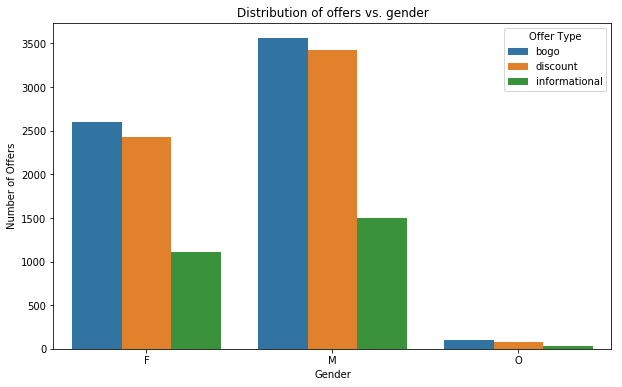

In [66]:
#Offers vs. Gender
plt.figure(figsize=(10, 6))
sns.countplot(x=profile.gender, 
              hue = 'offer_type', data=df_offer)
plt.title('Distribution of offers vs. gender')
plt.ylabel('Number of Offers')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show()

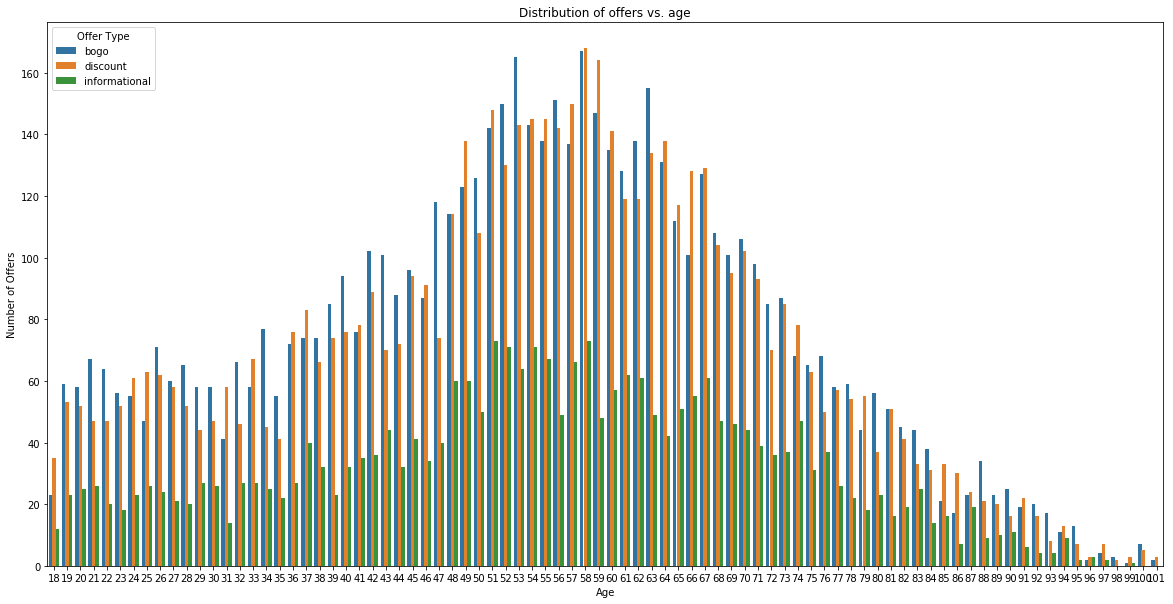

In [67]:
#Offers vs. Age
plt.figure(figsize=(20, 10))
sns.countplot(x=cleaned_profile.age, 
              hue = 'offer_type', data=df_offer)
plt.title('Distribution of offers vs. age')
plt.ylabel('Number of Offers')
plt.xlabel('Age')
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show()

<a id='Modeling'></a>
### Data Modeling

**Build Recommendation Engine**

**1- Rank-Based Recommendations**

The function below to return the **n** top offers ordered with most interactions as the top.

In [68]:
df_offer.head()

,event,customer_id,offer_id,time,completed,received,viewed,difficulty,duration,offer_type,...,social,web,bogo,discount,informational,age,became_member_on,gender,income,became_member_on_by_days
0,received,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,0,5,7,bogo,...,0,1,1,0,0,75,20170509,F,100000.0,1063
1,received,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0,0,1,0,10,7,discount,...,0,1,0,1,0,68,20180426,M,70000.0,711
2,received,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,0,0,1,0,5,5,bogo,...,1,1,1,0,0,65,20180209,M,53000.0,787
3,received,2eeac8d8feae4a8cad5a6af0499a211d,3f207df678b143eea3cee63160fa8bed,0,0,1,0,0,4,informational,...,0,1,0,0,1,58,20171111,M,51000.0,877
4,received,aa4862eba776480b8bb9c68455b8c2e1,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0,1,0,20,10,discount,...,0,1,0,1,0,61,20170911,F,57000.0,938


In [69]:
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148805 entries, 0 to 148804
Data columns (total 23 columns):
event                       148805 non-null object
customer_id                 148805 non-null object
offer_id                    148805 non-null object
time                        148805 non-null int64
completed                   148805 non-null uint8
received                    148805 non-null uint8
viewed                      148805 non-null uint8
difficulty                  148805 non-null int64
duration                    148805 non-null int64
offer_type                  148805 non-null object
reward                      148805 non-null int64
email                       148805 non-null int64
mobile                      148805 non-null int64
social                      148805 non-null int64
web                         148805 non-null int64
bogo                        148805 non-null uint8
discount                    148805 non-null uint8
informational               148805 

In [70]:
def get_top_offers(n, df=df_offer):
    '''
    INPUT:
    n - (int) the number of top offers to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_offers - (list) A list of the top 'n' offers type
    
    '''
    #Sort offers list by most interactions as the top
    sorted_offers_list = df.groupby('offer_type')['customer_id'].count().sort_values(ascending=False).index
    #Get Ton n articles
    top_offers = sorted_offers_list[:n].tolist()
    
    return top_offers # Return the top offers  from df

def get_top_offers_ids(n, df=df_offer):
    '''
    INPUT:
    n - (int) the number of top offers to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_offers - (list) A list of the top 'n' article titles 
    
    '''
    #Sort offers ids list by most interactions as the top
    sorted_offers_list = df.groupby('offer_id')['customer_id'].count().sort_values(ascending=False).index
    #Get Ton n offers ids
    top_offers = [str(offer_id) for offer_id in sorted_offers_list[:n].tolist()]
    
    return top_offers # Return the top offers ids

In [71]:
print(get_top_offers(1))

['bogo']


In [72]:
print(get_top_offers_ids(1))

['fafdcd668e3743c1bb461111dcafc2a4']


**2- User-User Based Collaborative Filtering**

`1.` The function below to reformat the **df** dataframe to be shaped with customers as the rows and offers as the columns.  

* Each **customer** should only appear in each **row** once.


* Each **offers** should only show up in one **column**.  


* **If a customer has interacted with an offer, then place a 1 where the user-row meets for that offer-column**.  It does not matter how many times a customer has interacted with the offer, all entries where a customer has interacted with an offer should be a 1.  


* **If a customer has not interacted with an item, then place a zero where the user-row meets for that offer-column**. 

In [73]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df):
    '''
    INPUT:
    df - pandas dataframe with offer_id, ..., customer_id columns
    
    OUTPUT:
    user_item - user item matrix 
    
    Description:
    Return a matrix with customer ids as rows and offer ids on the columns with 1 values where a customer interacted with 
    an offer and a 0 otherwise
    '''
    #Create a dataframe which has users as row and offers as column for non-dublicates
    df_users_offers = df.drop_duplicates(subset=['offer_id','customer_id'])
    #Count number of frequacy bet. users and articles
    user_item = df_users_offers.groupby(['customer_id','offer_id'])['event'].count().unstack()
    #Fill the dataframe o insted of NaN
    user_item.fillna(0, inplace=True) 
    return user_item # return the user_item matrix 

user_item = create_user_item_matrix(offer_data)

In [74]:
#Show dataframe result
user_item.head()

offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,2906b810c7d4411798c6938adc9daaa5,3f207df678b143eea3cee63160fa8bed,4d5c57ea9a6940dd891ad53e9dbe8da0,5a8bc65990b245e5a138643cd4eb9837,9b98b8c7a33c4b65b9aebfe6a799e6d9,ae264e3637204a6fb9bb56bc8210ddfd,f19421c1d4aa40978ebb69ca19b0e20d,fafdcd668e3743c1bb461111dcafc2a4
customer_id,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
0011e0d4e6b944f998e987f904e8c1e5,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
0020c2b971eb4e9188eac86d93036a77,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
0020ccbbb6d84e358d3414a3ff76cffd,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
003d66b6608740288d6cc97a6903f4f0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [75]:
user_item.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14820 entries, 0009655768c64bdeb2e877511632db8f to ffff82501cea40309d5fdd7edcca4a07
Data columns (total 10 columns):
0b1e1539f2cc45b7b9fa7c272da2e1d7    14820 non-null float64
2298d6c36e964ae4a3e7e9706d1fb8c2    14820 non-null float64
2906b810c7d4411798c6938adc9daaa5    14820 non-null float64
3f207df678b143eea3cee63160fa8bed    14820 non-null float64
4d5c57ea9a6940dd891ad53e9dbe8da0    14820 non-null float64
5a8bc65990b245e5a138643cd4eb9837    14820 non-null float64
9b98b8c7a33c4b65b9aebfe6a799e6d9    14820 non-null float64
ae264e3637204a6fb9bb56bc8210ddfd    14820 non-null float64
f19421c1d4aa40978ebb69ca19b0e20d    14820 non-null float64
fafdcd668e3743c1bb461111dcafc2a4    14820 non-null float64
dtypes: float64(10)
memory usage: 1.2+ MB


`2.` The function below which should take a customer_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided customer_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users. 

In [76]:
def find_similar_users(customer_id, user_item=user_item):
    '''
    INPUT:
    customer_id - (int) a user_id
    user_item - (pandas dataframe) matrix of users by offers: 
                1's when a user has interacted with an offer, 0 otherwise
    
    OUTPUT:
    similar_users - (list) an ordered list where the closest users (largest dot product users)
                    are listed first
    
    Description:
    Computes the similarity of every pair of users based on the dot product
    Returns an ordered
    
    '''
    # compute similarity of each user to the provided user
    dot_user  = user_item.dot(user_item.loc[customer_id])

    # sort by similarity
    dot_user  = dot_user.sort_values(ascending=False)

    # create list of just the ids
    most_similar_users = dot_user.index.tolist()
   
    # remove the own user's id
    most_similar_users.remove(customer_id)
       
    return most_similar_users # return a list of the users in order from most to least similar

In [77]:
print("The 3 most similar users to customer id 'customer_id' are: {}".format(find_similar_users('0011e0d4e6b944f998e987f904e8c1e5')[:3]))

The 3 most similar users to customer id 'customer_id' are: ['2c1c0c45d25d43099388a97204878874', 'b1e5000082ef4b23b47589e2ca0a9951', '0e4e14ea66044a9eaee0b5efbff6ca62']


`3.` Function that provides the most similar users to each user, you will want to use these users to find offer you can recommend.

In [78]:
def get_offer_names(offer_ids, df=df_offer):
    '''
    INPUT:
    offer_ids - (list) a list of offer ids
    df - (pandas dataframe) df as defined at the top of the notebook
    
    OUTPUT:
    offer_names - (list) a list of offer names associated with the list of offer ids 
                    (this is identified by the title column)
    '''
    #Create dataframe which has a list of non duplicated offers names
    offer_names = df[df['offer_id'].isin(offer_ids)]['offer_type'].unique().tolist()
    
    return offer_names # Return the offer names associated with list of offer ids

def get_user_offers(customer_id, user_item=user_item):
    '''
    INPUT:
    customer_id - (int) a customer id
    user_item - (pandas dataframe) matrix of users by offers: 
                1's when a user has interacted with an offer, 0 otherwise
    
    OUTPUT:
    offer_ids - (list) a list of the offer ids seen by the user
    offer_names - (list) a list of offer names associated with the list of offer ids 
                    (this is identified by the doc_full_name column in df_content)
    
    Description:
    Provides a list of the offer_ids and offer ids that have been seen by a user
    '''
    #List of offer names
    offers = user_item.loc[customer_id]
    
    #viewed offers - non zero-
    viwed_offers = offers[offers != 0]
    
    #List of offer ids
    offer_ids = [str(id) for id in viwed_offers.index.tolist()]
    
    #List of offer names
    offer_names = get_offer_names(offer_ids, df_offer)
    
    return offer_ids, offer_names # return the ids and names


def user_user_recs(customer_id, m=10):
    '''
    INPUT:
    customer_id - (int) a customer id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user
    
    Description:
    Loops through the users based on closeness to the input user_id
    For each user - finds offers the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    Users who are the same closeness are chosen arbitrarily as the 'next' user
    
    For the user where the number of recommended offers starts below m 
    and ends exceeding m, the last items are chosen arbitrarily
    
    '''
    #Find similar users
    closeness_users = find_similar_users(customer_id)
    
    #Find offers have viwed
    user_offers_vewid = get_user_offers(customer_id)[0]

    #Initiate numpy array
    recs = np.array([])

    #Go through users
    for user in closeness_users:
        #Compare bet. two users
        new_user_offers = get_user_offers(user)[0]
        
        recs_offers = np.setdiff1d(new_user_offers,user_offers_vewid, assume_unique=True)

        recs = np.unique(np.concatenate([recs_offers, recs], axis=0)) 

        if len(recs) > m-1:
            break    
    return recs[:m] # return your recommendations for this customer_id  

In [79]:
# Return 3 recommendations for customer id '0011e0d4e6b944f998e987f904e8c1e5'
get_offer_names(user_user_recs('0011e0d4e6b944f998e987f904e8c1e5', 3)) 

['discount', 'bogo']

`4.` improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total offer interactions before choosing those with fewer offer interactions.


* Instead of arbitrarily choosing offers from the user where the number of recommended offers starts below m and ends exceeding m, choose articles with the offers with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_offers** function earlier.

In [80]:
def get_top_sorted_users(customer_id, df=df_offer, user_item=user_item):
    '''
    INPUT:
    customer_id - (int)
    df - (pandas dataframe) df as defined at the top of the notebook 
    user_item - (pandas dataframe) matrix of users by offers: 
            1's when a user has interacted with an offer, 0 otherwise
    
            
    OUTPUT:
    neighbors_df - (pandas dataframe) a dataframe with:
                    neighbor_id - is a neighbor customer_id
                    similarity - measure of the similarity of each user to the provided customer_id
                    num_interactions - the number of offers viewed by the user - if a u
                    
    Other Details - sort the neighbors_df by the similarity and then by number of interactions where 
                    highest of each is higher in the dataframe
     
    
    '''  
    #the number of articles viewed by the user provided
    df_offer_views = df.groupby('customer_id').count() 
    
    #the number of articles viewed by the user
    similarity = []
    for user in user_item.index:
        similarity_user =  np.dot(user_item.loc[customer_id,:],user_item.loc[user,:]) 
        similarity.append((user, similarity_user))

    #Sort
    similarity.sort(key=lambda x: x[1], reverse=True)

    #Create dataframe accross users and similarity
    df_similarity = pd.DataFrame()
    df_similarity['customer_id'] = [x[0] for x in similarity]
    df_similarity['similarity'] = [x[1] for x in similarity]
    df_similarity = df_similarity.set_index('customer_id')

    #Dataframe with users sorted by closest followed by most articles viewed
    neighbors_df = pd.merge(df_similarity,df_offer_views, left_index=True, right_index=True)       
    neighbors_df = neighbors_df[['similarity', 'offer_id']]
    neighbors_df = neighbors_df.reset_index()
    neighbors_df.columns = ['neighbor_id', 'similarity', 'num_interactions']
    neighbors_df = neighbors_df.sort_values(by=['similarity', 'num_interactions'], ascending=False)

    return neighbors_df[1:] # Return the dataframe specified in the doc_string

    '''
    colName = ['neighbor_id', 'similarity', 'num_interactions']
    neighbors_df = pd.DataFrame(columns = colName)

    for i in user_item.index.values:
        if i == user_id:
            continue
        neighbor_id = i
        similarity = user_item[user_item.index == user_id].dot(user_item.loc[i].T).values[0]
        num_interactions = user_item.loc[i].values.sum()
        neighbors_df.loc[neighbor_id] = [neighbor_id, similarity, num_interactions]

    neighbors_df['similarity'] = neighbors_df['similarity'].astype('int')
    neighbors_df['neighbor_id'] = neighbors_df['neighbor_id'].astype('int')
    neighbors_df = neighbors_df.sort_values(by = ['similarity', 'neighbor_id'], ascending = [False, True])
    
    return neighbors_df  # Return the dataframe specified in the doc_string
    '''
def user_user_recs_part2(customer_id, m=10):
    '''
    INPUT:
    customer_id - (int) a customer id
    m - (int) the number of recommendations you want for the user
    
    OUTPUT:
    recs - (list) a list of recommendations for the user by offer id
    rec_names - (list) a list of recommendations for the user by offer
    
    Description:
    Loops through the users based on closeness to the input customer_id
    For each user - finds offers the user hasn't seen before and provides them as recs
    Does this until m recommendations are found
    
    Notes:
    * Choose the users that have the most total offer interactions 
    before choosing those with fewer offer interactions.

    * Choose offers with the offers with the most total interactions 
    before choosing those with fewer total interactions. 
   
    '''
    
    #Find similar users
    closeness_users = get_top_sorted_users(customer_id)

    #Find articles have viwed
    user_offers_viwed = get_user_offers(customer_id)[0]
    
    #Initiate numpy array
    recs = np.array([])

    #Go through users
    for user in closeness_users['neighbor_id'].values:
    
        new_user_offers = get_user_offers(user)[0]
    
        recs_offers = np.setdiff1d(new_user_offers,user_offers_viwed, assume_unique=True)

        recs = np.unique(np.concatenate([recs_offers, recs], axis=0)) 

        if len(recs) > m-1:
            break
     
    recs = recs[:m]    
    
    rec_names = get_offer_names(recs) 
    
    return recs, rec_names

In [81]:
rec_ids, rec_names = user_user_recs_part2('0011e0d4e6b944f998e987f904e8c1e5', 2)

In [82]:
print("The top 2 recommendations for user '0011e0d4e6b944f998e987f904e8c1e5' are the following offer ids:")
print(rec_ids)
print()
print("The top 2 recommendations for user '0011e0d4e6b944f998e987f904e8c1e5' are the following offer names:")
print(rec_names)

The top 2 recommendations for user '0011e0d4e6b944f998e987f904e8c1e5' are the following offer ids:
['4d5c57ea9a6940dd891ad53e9dbe8da0' 'fafdcd668e3743c1bb461111dcafc2a4']

The top 2 recommendations for user '0011e0d4e6b944f998e987f904e8c1e5' are the following offer names:
['discount', 'bogo']


`5.` Use  functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.

In [83]:
print(get_top_sorted_users('0011e0d4e6b944f998e987f904e8c1e5').head())

                         neighbor_id  similarity  num_interactions
17  b1e5000082ef4b23b47589e2ca0a9951         5.0                15
18  e08f5946ac204395ba4b6168505eccbc         5.0                15
19  e0e49ad96fd44cb799c191cf7b4ccd32         5.0                15
22  fda12536deae4b0f8e7cd51da5e6e9b3         5.0                14
0   0011e0d4e6b944f998e987f904e8c1e5         5.0                13


In [84]:
print(get_top_sorted_users('e08f5946ac204395ba4b6168505eccbc').head(10))

                         neighbor_id  similarity  num_interactions
0   0252aa6f0dee4585ba886945c60f48f5         6.0                12
1   45c8771f67dd43de858235f6a28a7323         6.0                10
70  a60c0dfc92be47b3ac8644eaede4bb15         5.0                17
29  47bbfabcf1e447a79b7f189d2b197b05         5.0                16
50  80242cc3d985484fbeeeb7d3cf828b71         5.0                16
69  a5e2537543c042c09349d14ce47cf083         5.0                16
10  174f1571d41543d4b11cc523342352a2         5.0                15
13  1997b4c538804d42bac6d58c32ec26b4         5.0                15
25  3b3e4f3238db42eebb04b1f658b55a9f         5.0                15
26  3b6a6519f1454fb88f32e3693c420739         5.0                15


<a id='Evaluation'></a>
### Evaluation

**3- Matrix Factorization**

In this part will build use matrix factorization to make offer recommendations to the customer on the Starbucks app.

In [85]:
# Load the matrix here
user_item_matrix = user_item.copy()

In [86]:
# quick look at the matrix
user_item_matrix.head()

offer_id,0b1e1539f2cc45b7b9fa7c272da2e1d7,2298d6c36e964ae4a3e7e9706d1fb8c2,2906b810c7d4411798c6938adc9daaa5,3f207df678b143eea3cee63160fa8bed,4d5c57ea9a6940dd891ad53e9dbe8da0,5a8bc65990b245e5a138643cd4eb9837,9b98b8c7a33c4b65b9aebfe6a799e6d9,ae264e3637204a6fb9bb56bc8210ddfd,f19421c1d4aa40978ebb69ca19b0e20d,fafdcd668e3743c1bb461111dcafc2a4
customer_id,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
0011e0d4e6b944f998e987f904e8c1e5,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
0020c2b971eb4e9188eac86d93036a77,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
0020ccbbb6d84e358d3414a3ff76cffd,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
003d66b6608740288d6cc97a6903f4f0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


Use Singular Value Decomposition from numpy on the user-item matrix. 

In [87]:
# Perform SVD on the User-Item Matrix Here

u, s, vt = np.linalg.svd(user_item_matrix) # use the built in to get the three matrices

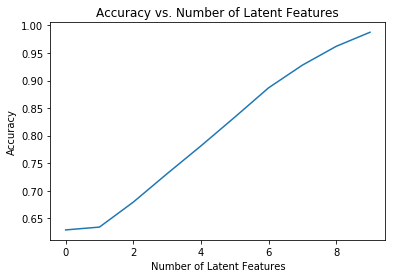

In [88]:
num_latent_feats = np.arange(10)
sum_errs = []

for k in num_latent_feats:
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u[:, :k], vt[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_matrix, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    sum_errs.append(err)
    
plt.plot(num_latent_feats, 1 - np.array(sum_errs)/df_offer.shape[0]);
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.title('Accuracy vs. Number of Latent Features');

From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations. Instead, we might split our dataset into a training and test set of data, as shown in the cell below.

To understand the impact on accuracy of the training and test sets of data with different numbers of latent features. Using the split below:

How many users can we make predictions for in the test set?
How many users are we not able to make predictions for because of the cold start problem?
How many articles can we make predictions for in the test set?
How many articles are we not able to make predictions for because of the cold start problem?

In [89]:
df_train = df_offer.head(40000)
df_test = df_offer.tail(5993)

def create_test_and_train_user_item(df_train, df_test):
    '''
    INPUT:
    df_train - training dataframe
    df_test - test dataframe
    
    OUTPUT:
    user_item_train - a user-item matrix of the training dataframe 
                      (unique users for each row and unique articles for each column)
    user_item_test - a user-item matrix of the testing dataframe 
                    (unique users for each row and unique articles for each column)
    test_idx - all of the test custmer ids
    test_arts - all of the test offer ids
    
    '''
    #unique users for each row and unique articles for each column
    user_item_train=create_user_item_matrix(df_train)
    

    #unique users for each row and unique articles for each column
    user_item_test=create_user_item_matrix(df_test)
    
    #all of the test user ids
    test_idx=user_item_test.index.tolist()
    
    #all of the test article ids
    test_arts=user_item_test.columns.tolist()
    
    return user_item_train, user_item_test, test_idx, test_arts

user_item_train, user_item_test, test_idx, test_arts = create_test_and_train_user_item(df_train, df_test)

In [90]:
print('How many users in the test set are we not able to make predictions for because of the cold start problem?')
+len(set(user_item_test.index) & set(user_item_train.index))

How many users in the test set are we not able to make predictions for because of the cold start problem?


4520

In [91]:
print('How many offers can we make predictions for in the test set?')
+len(set(user_item_test.columns) & set(user_item_train.columns))

How many offers can we make predictions for in the test set?


10

In [92]:
print('How many offers in the test set are we not able to make predictions for because of the cold start problem?') 
+len(set(user_item_test.columns) - set(user_item_train.columns))

How many offers in the test set are we not able to make predictions for because of the cold start problem?


0

In [93]:
print('How many users can we make predictions for in the test set?') 
+len(set(user_item_test.index) - set(user_item_train.index))

How many users can we make predictions for in the test set?


313

Now we use the user_item_train dataset from above to find U, S, and V transpose using SVD. Then find the subset of rows in the user_item_test dataset that you can predict using this matrix decomposition with different numbers of latent features to see how many features makes sense to keep based on the accuracy on the test data.

In [94]:
# fit SVD on the user_item_train matrix
u_train, s, vt_train = np.linalg.svd(user_item_train) # fit svd similar to above then use the cells below
u_test = u_train[user_item_train.index.isin(test_idx), :]
vt_test = vt_train[:, user_item_train.columns.isin(test_arts)]
test_idx = set(user_item_train.index) & set(user_item_test.index)
test_arts = set(user_item_train.columns) & set(user_item_test.columns)
user_item_test = user_item_test.loc[test_idx, test_arts]

In [95]:
#Compute accuracy for train 
num_latent_feats = np.arange(10)
train_sum_errs = []

for k in num_latent_feats:
    
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u_train[:, :k], vt_train[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_train, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    train_sum_errs.append(err)

In [96]:
#Compute accuracy for test 
num_latent_feats = np.arange(10)
test_sum_errs = []

for k in num_latent_feats:
    
    # restructure with k latent features
    s_new, u_new, vt_new = np.diag(s[:k]), u_test[:, :k], vt_test[:k, :]
    
    # take dot product
    user_item_est = np.around(np.dot(np.dot(u_new, s_new), vt_new))
    
    # compute error for each prediction to actual value
    diffs = np.subtract(user_item_test, user_item_est)
    
    # total errors and keep track of them
    err = np.sum(np.sum(np.abs(diffs)))
    test_sum_errs.append(err)

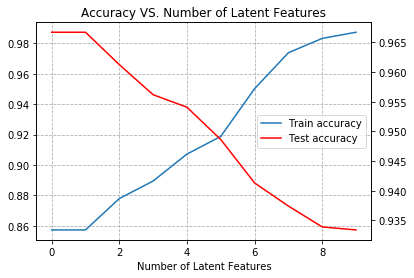

In [97]:
# Visualization
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(num_latent_feats, 1 - np.array(train_sum_errs)/df_offer.shape[0], label="Train accuracy")
ax2.plot(num_latent_feats, 1 - np.array(test_sum_errs)/df_offer.shape[0], color='red', label="Test accuracy")

handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1+handler2, label1+label2, loc='center right')

ax1.set_title('Accuracy VS. Number of Latent Features')
ax1.grid(linestyle='--')

ax1.set_xlabel('Number of Latent Features')

plt.show()

<a id='Conclusions'></a>
### Conclusions

At the end, we can see that the accuracy is good and was improved. However, we have the possibility to combine other recommendation method to get better accuracy (Top_offer). In addition we can apply A\B testing to determine which recommendation method is most effective and accurate.I think because the matrix factorization is limited to small group of validation. due to that we can use knowledge or content based recommendation on test set to get better accuracy. To be sure we can apply the next steps:
- Use one of the accuracy metrics such as F1 scores. 
- In addition, we can apply control and expermintal user group to get reliable feedback. 
- Now, we can apply A/B testing by comparing between the two groups of users (test A and train B user groups) to variant A group against B group to determine is this recommendation system is accurate or not.

In [99]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Starbucks_Capstone_notebook.ipynb'])

0